# Entropy

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
entropy_list =[
]
for red in range(1,50) :
    black = 50-red
    entro  = -((red/50 * np.log2(red/50)) + (black/50 * np.log2(black/50)))
    entropy_list.append(entro)

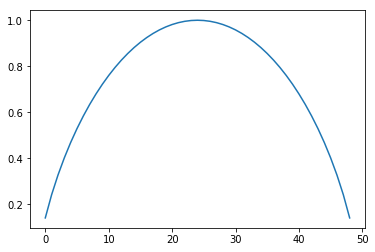

In [16]:
plt.plot(entropy_list)

# Titanic

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [18]:
df = pd.read_csv("train.csv")

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
selected_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
        'Parch']

In [25]:
data = df.loc[:,selected_cols]

In [26]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


In [28]:
data.Age.fillna(np.mean(data.Age),inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


In [30]:
le = LabelEncoder()

In [31]:
# le.fit(data.Sex)
data["Sex"] = le.fit_transform(data.Sex)

In [32]:
# le.classes_

In [33]:
# le.transform(data.Sex)

In [34]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [35]:
X = data.loc[:,[ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

In [36]:
y = data['Survived']

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Pclass    891 non-null int64
Sex       891 non-null int32
Age       891 non-null float64
SibSp     891 non-null int64
Parch     891 non-null int64
dtypes: float64(1), int32(1), int64(3)
memory usage: 31.4 KB


In [38]:
def entropy(column) :
    vals, counts = np.unique(column, return_counts=True)
    total = len(column)
    
    acc = 0
    for count in counts :
        acc+= (count/total)*np.log2(count/total)
    return -acc

In [39]:
entropy(y)

0.9607079018756469

In [40]:
def info_gain(X, y, label) :
    pivot = np.mean(X[label])
    
    y_left = y[X[label]<pivot]
    y_right = y[X[label]>=pivot]
    
    if (len(y_left) == 0) or (len(y_right) == 0) :
        return -1000
    
    left = (len(y_left)/len(y))*entropy(y_left)
    right = (len(y_right)/len(y))*entropy(y_right)
    
    return entropy(y) -left - right

In [41]:
info_gain(X,y,"Pclass")

0.07579362743608165

In [42]:
for label in X.columns :
    print(label,info_gain(X,y,label))

Pclass 0.07579362743608165
Sex 0.2176601066606143
Age 0.001158644038169343
SibSp 0.009584541813400127
Parch 0.015380754493137666


In [43]:
class Node :
    def __init__(self ,label=None,value=None,result=None) :
        self.label = label
        self.value = value
        self.result = result

In [65]:
class DecisionTree :
    def __init__(self, max_depth = 5) :
        self.max_depth = max_depth
        
    def fit(self,X,y) :
        self.root = self.generate(X,y,self.max_depth)
        
    def generate(self, X, y, depth) :
        if depth == 1 :
            return Node(result=np.mean(y))
        
        gains=[]
        for label in X.columns :
            gain = info_gain(X,y,label)
            gains.append((gain,label))
            
#         print(gains)

        selected_label = max(gains)[1]
        
        pivot = np.mean(X[selected_label])
        
        X_left = X[X[selected_label]<pivot]
        y_left = y[X[selected_label]<pivot]
        
        X_right = X[X[selected_label]>=pivot]
        y_right = y[X[selected_label]>=pivot]
        
        node = Node(selected_label, pivot)
        node.left = self.generate(X_left,y_left,depth-1)
        node.right = self.generate(X_right,y_right,depth-1)
        
        return node
#         self.generate(X_left,y_left,depth-1)
#         self.generate(X_right,y_right,depth-1)

    def display(self,node,indent=0) :
        if node.label == None :
            if node.result < .5 :
                print("\t"*indent, "Died :(")
            elif node.result >= .5 :
                print("\t"*indent, "Survived :)")
#             print("\t"*indent, node.result)
            return
        print("\t"*indent,node.label, node.value)
        self.display(node.left,indent+1)
        self.display(node.right,indent+1)
    
    def predict_point(self,row,node) :
        if node.label == None :
            return node.result
        
        if row[node.label] < node. value :
            return self.predict_point(row, node.left)
        else :
            return self.predict_point(row, node.right)
            
    def predict(self,X) :
        y = []
        for index,row in X.iterrows() :
            res = int(self.predict_point(row,self.root)> 0.5)
            y.append(res)
        print(y)
        return np.array(y)
    
    def score(self,X,y) :
        yp = self.predict(X)
        
        return sum(y.values == yp)/len(y)
        
            

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [67]:
model = DecisionTree(13)

In [68]:
model.fit(X_train,y_train)

In [69]:
# model.display(model.root)

In [70]:
model.predict(X.loc[:10])

[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0]


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0])

In [75]:
# model.score(X_test,y_test)
# model.score(X_train,y_train)
y.loc[:10]

0     0
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     1
9     1
10    1
Name: Survived, dtype: int64

In [51]:
s={9}

In [52]:
type(s)

set

In [53]:
s={9:2}

In [54]:
type(s)

dict

In [55]:
def slowestKey(keyTimes):
    # Write your code here
    l=keyTimes
    char = [k for k in "abcdefghijklmnopqrstuvwxyz"]
    # for i in range(n) :
    #     x,y = input("").split()
    #     l.append(int(x))
    #     l.append(int(y))
    time = [[l[0][1],l[0][0]]]
    for i in range(1,len(l)) :
        time.append([l[i][1] - l[i-1][1],l[i][0]])
    time = sorted(time, reverse = True)
    print(char[time[0][1]])

In [56]:
keyTimes = [[0,2],[1,3],[0,7]]
s = slowestKey(keyTimes)

a


In [64]:
for i in X.iterrows() :
    print((i[1]))

Pclass     3.0
Sex        1.0
Age       22.0
SibSp      1.0
Parch      0.0
Name: 0, dtype: float64
Pclass     1.0
Sex        0.0
Age       38.0
SibSp      1.0
Parch      0.0
Name: 1, dtype: float64
Pclass     3.0
Sex        0.0
Age       26.0
SibSp      0.0
Parch      0.0
Name: 2, dtype: float64
Pclass     1.0
Sex        0.0
Age       35.0
SibSp      1.0
Parch      0.0
Name: 3, dtype: float64
Pclass     3.0
Sex        1.0
Age       35.0
SibSp      0.0
Parch      0.0
Name: 4, dtype: float64
Pclass     3.000000
Sex        1.000000
Age       29.699118
SibSp      0.000000
Parch      0.000000
Name: 5, dtype: float64
Pclass     1.0
Sex        1.0
Age       54.0
SibSp      0.0
Parch      0.0
Name: 6, dtype: float64
Pclass    3.0
Sex       1.0
Age       2.0
SibSp     3.0
Parch     1.0
Name: 7, dtype: float64
Pclass     3.0
Sex        0.0
Age       27.0
SibSp      0.0
Parch      2.0
Name: 8, dtype: float64
Pclass     2.0
Sex        0.0
Age       14.0
SibSp      1.0
Parch      0.0
Name: 9, dtype

Pclass     3.000000
Sex        1.000000
Age       29.699118
SibSp      0.000000
Parch      0.000000
Name: 101, dtype: float64
Pclass     1.0
Sex        1.0
Age       21.0
SibSp      0.0
Parch      1.0
Name: 102, dtype: float64
Pclass     3.0
Sex        1.0
Age       33.0
SibSp      0.0
Parch      0.0
Name: 103, dtype: float64
Pclass     3.0
Sex        1.0
Age       37.0
SibSp      2.0
Parch      0.0
Name: 104, dtype: float64
Pclass     3.0
Sex        1.0
Age       28.0
SibSp      0.0
Parch      0.0
Name: 105, dtype: float64
Pclass     3.0
Sex        0.0
Age       21.0
SibSp      0.0
Parch      0.0
Name: 106, dtype: float64
Pclass     3.000000
Sex        1.000000
Age       29.699118
SibSp      0.000000
Parch      0.000000
Name: 107, dtype: float64
Pclass     3.0
Sex        1.0
Age       38.0
SibSp      0.0
Parch      0.0
Name: 108, dtype: float64
Pclass     3.000000
Sex        0.000000
Age       29.699118
SibSp      1.000000
Parch      0.000000
Name: 109, dtype: float64
Pclass     1.0
S

Name: 223, dtype: float64
Pclass     1.0
Sex        1.0
Age       38.0
SibSp      1.0
Parch      0.0
Name: 224, dtype: float64
Pclass     3.0
Sex        1.0
Age       22.0
SibSp      0.0
Parch      0.0
Name: 225, dtype: float64
Pclass     2.0
Sex        1.0
Age       19.0
SibSp      0.0
Parch      0.0
Name: 226, dtype: float64
Pclass     3.0
Sex        1.0
Age       20.5
SibSp      0.0
Parch      0.0
Name: 227, dtype: float64
Pclass     2.0
Sex        1.0
Age       18.0
SibSp      0.0
Parch      0.0
Name: 228, dtype: float64
Pclass     3.000000
Sex        0.000000
Age       29.699118
SibSp      3.000000
Parch      1.000000
Name: 229, dtype: float64
Pclass     1.0
Sex        0.0
Age       35.0
SibSp      1.0
Parch      0.0
Name: 230, dtype: float64
Pclass     3.0
Sex        1.0
Age       29.0
SibSp      0.0
Parch      0.0
Name: 231, dtype: float64
Pclass     2.0
Sex        1.0
Age       59.0
SibSp      0.0
Parch      0.0
Name: 232, dtype: float64
Pclass    3.0
Sex       0.0
Age       5.

Pclass     1.0
Sex        0.0
Age       18.0
SibSp      2.0
Parch      2.0
Name: 311, dtype: float64
Pclass     2.0
Sex        0.0
Age       26.0
SibSp      1.0
Parch      1.0
Name: 312, dtype: float64
Pclass     3.0
Sex        1.0
Age       28.0
SibSp      0.0
Parch      0.0
Name: 313, dtype: float64
Pclass     2.0
Sex        1.0
Age       43.0
SibSp      1.0
Parch      1.0
Name: 314, dtype: float64
Pclass     3.0
Sex        0.0
Age       26.0
SibSp      0.0
Parch      0.0
Name: 315, dtype: float64
Pclass     2.0
Sex        0.0
Age       24.0
SibSp      1.0
Parch      0.0
Name: 316, dtype: float64
Pclass     2.0
Sex        1.0
Age       54.0
SibSp      0.0
Parch      0.0
Name: 317, dtype: float64
Pclass     1.0
Sex        0.0
Age       31.0
SibSp      0.0
Parch      2.0
Name: 318, dtype: float64
Pclass     1.0
Sex        0.0
Age       40.0
SibSp      1.0
Parch      1.0
Name: 319, dtype: float64
Pclass     3.0
Sex        1.0
Age       22.0
SibSp      0.0
Parch      0.0
Name: 320, dtype

Pclass     3.000000
Sex        1.000000
Age       29.699118
SibSp      0.000000
Parch      0.000000
Name: 464, dtype: float64
Pclass     3.0
Sex        1.0
Age       38.0
SibSp      0.0
Parch      0.0
Name: 465, dtype: float64
Pclass     2.000000
Sex        1.000000
Age       29.699118
SibSp      0.000000
Parch      0.000000
Name: 466, dtype: float64
Pclass     1.0
Sex        1.0
Age       56.0
SibSp      0.0
Parch      0.0
Name: 467, dtype: float64
Pclass     3.000000
Sex        1.000000
Age       29.699118
SibSp      0.000000
Parch      0.000000
Name: 468, dtype: float64
Pclass    3.00
Sex       0.00
Age       0.75
SibSp     2.00
Parch     1.00
Name: 469, dtype: float64
Pclass     3.000000
Sex        1.000000
Age       29.699118
SibSp      0.000000
Parch      0.000000
Name: 470, dtype: float64
Pclass     3.0
Sex        1.0
Age       38.0
SibSp      0.0
Parch      0.0
Name: 471, dtype: float64
Pclass     2.0
Sex        0.0
Age       33.0
SibSp      1.0
Parch      2.0
Name: 472, dtype:

Pclass     3.0
Sex        1.0
Age       24.0
SibSp      2.0
Parch      0.0
Name: 565, dtype: float64
Pclass     3.0
Sex        1.0
Age       19.0
SibSp      0.0
Parch      0.0
Name: 566, dtype: float64
Pclass     3.0
Sex        0.0
Age       29.0
SibSp      0.0
Parch      4.0
Name: 567, dtype: float64
Pclass     3.000000
Sex        1.000000
Age       29.699118
SibSp      0.000000
Parch      0.000000
Name: 568, dtype: float64
Pclass     3.0
Sex        1.0
Age       32.0
SibSp      0.0
Parch      0.0
Name: 569, dtype: float64
Pclass     2.0
Sex        1.0
Age       62.0
SibSp      0.0
Parch      0.0
Name: 570, dtype: float64
Pclass     1.0
Sex        0.0
Age       53.0
SibSp      2.0
Parch      0.0
Name: 571, dtype: float64
Pclass     1.0
Sex        1.0
Age       36.0
SibSp      0.0
Parch      0.0
Name: 572, dtype: float64
Pclass     3.000000
Sex        0.000000
Age       29.699118
SibSp      0.000000
Parch      0.000000
Name: 573, dtype: float64
Pclass     3.0
Sex        1.0
Age       1

Pclass     1.0
Sex        0.0
Age       15.0
SibSp      0.0
Parch      1.0
Name: 689, dtype: float64
Pclass     1.0
Sex        1.0
Age       31.0
SibSp      1.0
Parch      0.0
Name: 690, dtype: float64
Pclass    3.0
Sex       0.0
Age       4.0
SibSp     0.0
Parch     1.0
Name: 691, dtype: float64
Pclass     3.000000
Sex        1.000000
Age       29.699118
SibSp      0.000000
Parch      0.000000
Name: 692, dtype: float64
Pclass     3.0
Sex        1.0
Age       25.0
SibSp      0.0
Parch      0.0
Name: 693, dtype: float64
Pclass     1.0
Sex        1.0
Age       60.0
SibSp      0.0
Parch      0.0
Name: 694, dtype: float64
Pclass     2.0
Sex        1.0
Age       52.0
SibSp      0.0
Parch      0.0
Name: 695, dtype: float64
Pclass     3.0
Sex        1.0
Age       44.0
SibSp      0.0
Parch      0.0
Name: 696, dtype: float64
Pclass     3.000000
Sex        0.000000
Age       29.699118
SibSp      0.000000
Parch      0.000000
Name: 697, dtype: float64
Pclass     1.0
Sex        1.0
Age       49.0
S

Name: 847, dtype: float64
Pclass     2.0
Sex        1.0
Age       28.0
SibSp      0.0
Parch      1.0
Name: 848, dtype: float64
Pclass     1.000000
Sex        0.000000
Age       29.699118
SibSp      1.000000
Parch      0.000000
Name: 849, dtype: float64
Pclass    3.0
Sex       1.0
Age       4.0
SibSp     4.0
Parch     2.0
Name: 850, dtype: float64
Pclass     3.0
Sex        1.0
Age       74.0
SibSp      0.0
Parch      0.0
Name: 851, dtype: float64
Pclass    3.0
Sex       0.0
Age       9.0
SibSp     1.0
Parch     1.0
Name: 852, dtype: float64
Pclass     1.0
Sex        0.0
Age       16.0
SibSp      0.0
Parch      1.0
Name: 853, dtype: float64
Pclass     2.0
Sex        0.0
Age       44.0
SibSp      1.0
Parch      0.0
Name: 854, dtype: float64
Pclass     3.0
Sex        0.0
Age       18.0
SibSp      0.0
Parch      1.0
Name: 855, dtype: float64
Pclass     1.0
Sex        0.0
Age       45.0
SibSp      1.0
Parch      1.0
Name: 856, dtype: float64
Pclass     1.0
Sex        1.0
Age       51.0
SibSp